# Sectoral Model
In this notebook a model for each sectors is created.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, glob
from pathlib import Path
import re
import json
import seaborn as sns

from ProjectPackage.util import *
from ProjectPackage.DataProcessing import *
from ProjectPackage.Modeling import *
from ProjectPackage.PlotFunctions import *

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold

In [2]:
feature, target = load_dataframes()

In [3]:
data_dict = load_data_sector(
    n_months=6, # Number of months ahead to be predicted
    pct_change=True, # Compute percentage change
    drop_corr_features=True, # Drop highly correlated features
    encoding_method='numeric', # Encoding method for tickers and sectors ("numeric", "one-hot", or None)
    drop=False, # Drop one of the one hot encoding columns to avoid multicollinearity
    year_range=(2008, 2017) # Range of years to be included (inclusive)
)

In [4]:
data_dict.keys()

dict_keys(['MANUFACTURING', 'FINANCIAL INSTITUTIONS', 'TECHNOLOGY', 'HOTELS AND RESTAURANTS', 'WHOLESALE AND RETAIL TRADE'])

In [5]:
data_dict['MANUFACTURING'].keys()

dict_keys(['X', 'y', 'data'])

## Modeling Percentage change

### Linear regression

In [7]:
all_scores = run_sector_pct_model(
    LinearRegression,
    model_params={},
    model_fit_params={},
    month_range=range(1, 7),
    drop_corr_features=True,
    encoding_method='one-hot',
    drop=True,
    year_range=(2008, 2017),
)

C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dummy_cols.columns] = dummy_cols.copy()
C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dummy_cols.columns] = dummy_cols.copy()
C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting 

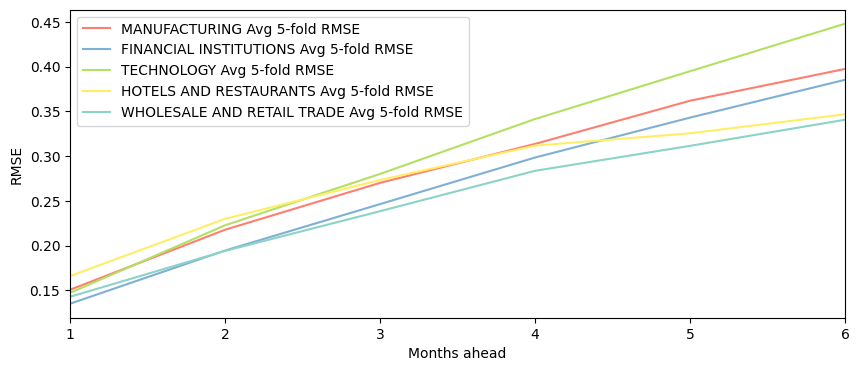

In [9]:
ax = plot_metric_by_months_sector(all_scores, 'RMSE')

In [10]:
# save_scores(all_scores, 'model_scores/LR_pct_sector.json')

### SVR

In [2]:
from ProjectPackage.ModelClasses import SVRRegressorRBF

In [3]:
model_fit_params = dict(C=1, gamma=0.1, cv=5, fit_grid=False)

In [4]:
all_scores = run_sector_pct_model(
    SVRRegressorRBF,
    model_params={},
    model_fit_params=model_fit_params,
    month_range=range(1, 7),
    drop_corr_features=True,
    encoding_method='one-hot',
    drop=False,
    year_range=(2008, 2017),
)

C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dummy_cols.columns] = dummy_cols.copy()
C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, dummy_cols.columns] = dummy_cols.copy()
C:\Users\suuser\Desktop\Git\CS512-project\ProjectPackage\DataProcessing.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting 

In [6]:
# save_scores(all_scores, 'model_scores/SVR_pct_sector.json')

Why R2 squared values are too high? [Read this](https://stats.stackexchange.com/questions/438847/r2-is-too-high-reasons)

In [14]:
lr_general_scores = load_scores('model_scores/LR_pct_general.json')
lr_sector_scores = load_scores('model_scores/LR_pct_sector.json')

svr_general_scores = load_scores('model_scores/SVR_pct_general.json')
svr_sector_scores = load_scores('model_scores/SVR_pct_sector.json')

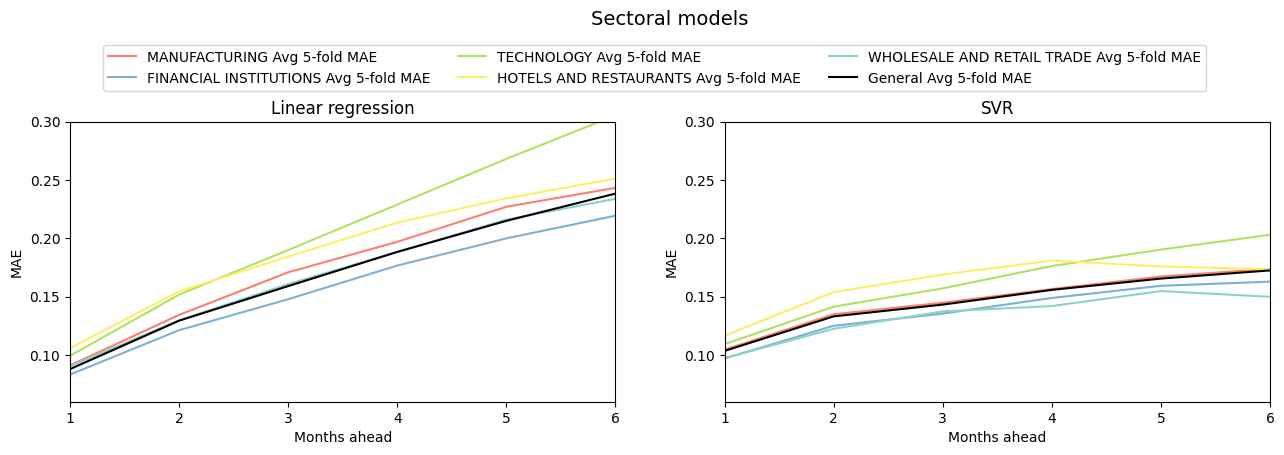

In [62]:
metric = 'MAE'

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax = axs[0]
plot_metric_by_months_sector(lr_sector_scores, metric, ax=ax)
plot_metric_by_months_general(lr_general_scores, metric, ax=ax, color='black', std=False)
ax.set_title('Linear regression')
legend = ax.legend()
ax.legend().remove()
ax.set_ylim(0.06, 0.3)

ax = axs[1]
plot_metric_by_months_sector(svr_sector_scores, metric, ax=ax)
plot_metric_by_months_general(svr_general_scores, metric, ax=ax, color='black', std=False)
ax.set_title('SVR')
ax.legend().remove()
ax.set_ylim(0.06, 0.3)

fig.subplots_adjust(left=0, bottom=0, right=1, top=0.7, wspace=0.2, hspace=0)
fig.legend(legend.legendHandles, map(lambda x: x.get_text(), legend.texts),
           ncols=3, loc=(0.08, 0.8))

fig.suptitle('Sectoral models', fontsize=14)
plt.show()